**Problem:**

For this assignment I will need 4 things:  The code, the model, confusion matrix and visualization of both training and testing set. 

This data has 5 variables: User Id, Gender, Age, Salary, and Purchased.  

For Purchased 1 means Purchased and 0 means did not purchase.  

Please properly transform the variables to prepare for a logistic regression model and run the model.  You will be graded on how the model fits and generalizes as well as the quality of the visualization produced by the model output.   You are trying to figure whether the person will purchased based upon the other variables provided.  Feel free to transmute, transform and engineer additional variables you see fit but the real reason for this model is to classify the person as a buyer or not.  


WARNING: If your model is 100% accurate, something is probably wrong.  The model is most likely over-fit.  

**Overview**

As already mentioned, we are given with 5 columns in the data. Among these 5 variables, one is the variable that we have to determine, i.e. 'Purchased'. Among the other 4 variables, there seems to be no sequence or pattern available in 'User ID', also, no information has been provided about whether the formulation of User Id is a a random process or a pattern/sequence dependent. Hence, we ignore the possibility of finding out something useful from this variable. 

To come to Final Model I followed following steps:
1. [Missing_Data](#Missing_Data)
2. [Correlation](#Correlation)
3. [EDA](#EDA)
4. [Feature_Engineering](#Feature_Engineering) to make clusters based on Age and Estimated Salary
5. [Train_Test_Split](#Train_Test_Split)
6. [Compare_Train_Test](#Compare_Train_Test)
7. [Model_Training](#Model_Training)

    A. [Without_Clusters](#Without_Clusters)
    
    i.   A model based on Age and Estimated Salary [Model1](#Model1)
    
    ii.  A model with Scaled data, and optimzed penalty and C [Model2](#Model1)
    
    iii. A model with Scaled data, Gender, and optimzed penalty and C [Model3](#Model1)
        
    B. [With_Clusters](#With_Clusters)
    
    i.   A model with Default parameters, unscaled data and clusters [Model4](#Model4)
   
    ii.  A model with optimized C and Penalty, Clusters and Gender [Final_Model](#Final_Model)
    
    
    

       
Suitability of models was judged from learning curve, confusion matrix, classification report, ROC and AUC, and Train/Test score. 
Final model has the following output:

   A. Train score = 0.89
   
   B. Test Sore = 0.91
   
   C. AUC = 0.9

For classification report, confusion matrix, ROC, and learning curve: [Final_Model](#Final_Model)

   

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Importing the file into a df named **social**

In [2]:
social = pd.read_csv("Social_Network_Ads.csv")
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
social.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
social['Gender'] = social['Gender'].map(lambda x: 1 if x=='Male' else 0)

In [5]:
social['Gender'] = social['Gender'].astype('int8')

From now on, 1 is for Male and 0 is for female

In [6]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null int8
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), int8(1)
memory usage: 13.0 KB


In [7]:
social.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


**35.75%** bought the services

## Checking if any data is missing in the df

<a id='Missing_Data'></a>

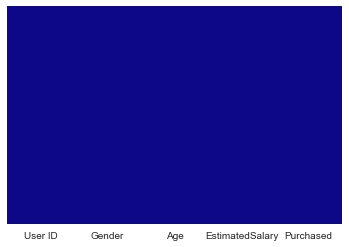

In [8]:

plt.figure();
sns.heatmap(social.isnull(), yticklabels=False, cbar=False, cmap="plasma");

No data is missing

## Correlation

<a id='Correlation_'></a>

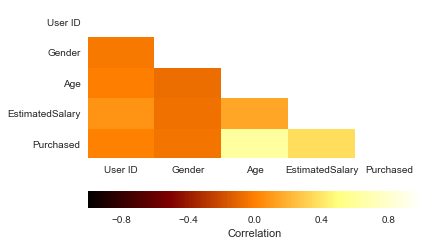

In [9]:

plt.figure(facecolor='white', frameon=False);
sns.set_style('whitegrid');
corr_mat = social.corr();
i=1;
for index in corr_mat.index:
    corr_mat.loc[index][i:]=1;
    i=i+1;
sns.heatmap(corr_mat, cbar_kws={"orientation": "horizontal", "label": "Correlation"}, cmap='afmhot');
plt.yticks(rotation=0);

<a id='EDA'></a>

## EDA

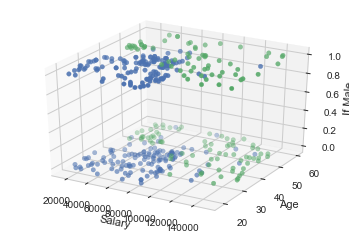

In [10]:

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure();
ax = fig.add_subplot(111, projection ='3d');
for purchase, socialsub in social.groupby('Purchased'):
    ax.scatter(socialsub['EstimatedSalary'], socialsub['Age'], socialsub['Gender'], label='Purchased');
ax.set_xlabel('Salary');
ax.set_ylabel('Age');
ax.set_zlabel('If Male');

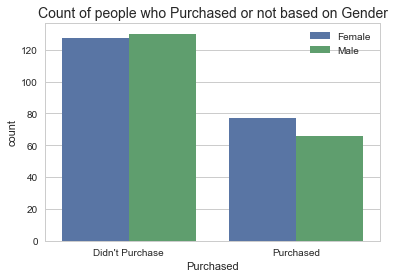

In [11]:
plt.figure()
sns.countplot(social['Purchased'],hue=social['Gender'] );
plt.axes().set_title('Count of people who Purchased or not based on Gender', fontsize=14);
plt.legend(['Female','Male']);
plt.xticks([0,1], ["Didn't Purchase", "Purchased"]);

Seems like there is a little difference in behavior between two genders

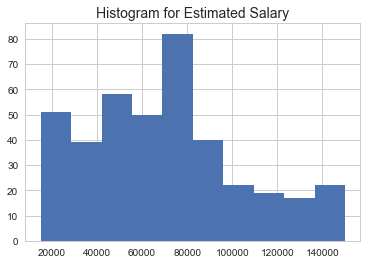

In [12]:
plt.figure()
plt.hist(social['EstimatedSalary']);
plt.axes().set_title("Histogram for Estimated Salary", fontsize = 14);

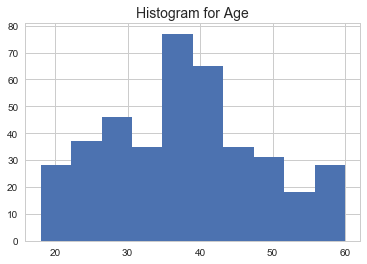

In [13]:
plt.figure()
plt.hist(social['Age']);
plt.axes().set_title("Histogram for Age", fontsize = 14);

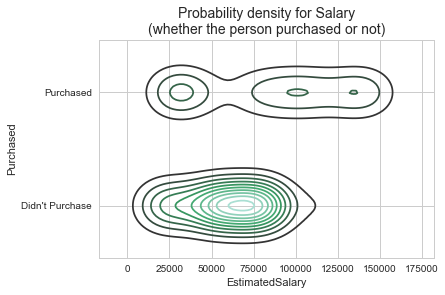

In [14]:
plt.figure()
sns.set_style('whitegrid');
sns.kdeplot(social['EstimatedSalary'], social['Purchased']);
plt.axes().set_title("Probability density for Salary\n(whether the person purchased or not)", fontsize=14);
plt.yticks([0,1],["Didn't Purchase",'Purchased']);

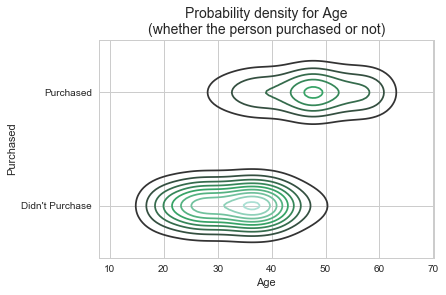

In [15]:

plt.figure()
sns.kdeplot(social['Age'], social['Purchased']);
plt.axes().set_title("Probability density for Age\n(whether the person purchased or not)", fontsize=14);
plt.yticks([0,1],["Didn't Purchase",'Purchased']);

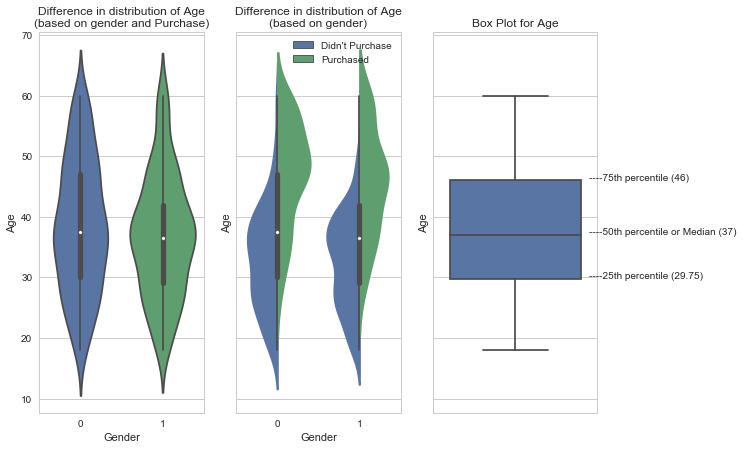

In [16]:

fig, ax = plt.subplots(1,3,figsize=(10,7),sharey=True)
sns.violinplot(x = 'Gender',y = 'Age', data=social, split=True, ax= ax[0]);
sns.violinplot(x = 'Gender',y = 'Age', hue='Purchased', data=social, split=True, ax= ax[1]);
sns.boxplot(y = social['Age'], ax=ax[2]);
ax[0].set_title("Difference in distribution of Age\n(based on gender and Purchase)");
ax[1].set_title("Difference in distribution of Age\n(based on gender)");
ax[2].set_title("Box Plot for Age");
ax[2].text(0.45, 46, "----75th percentile (46)");
ax[2].text(0.45, 37, "----50th percentile or Median (37)");
ax[2].text(0.45, 29.75, "----25th percentile (29.75)");
handles, labels = ax[1].get_legend_handles_labels();
ax[1].legend(handles, ["Didn't Purchase", "Purchased"]);

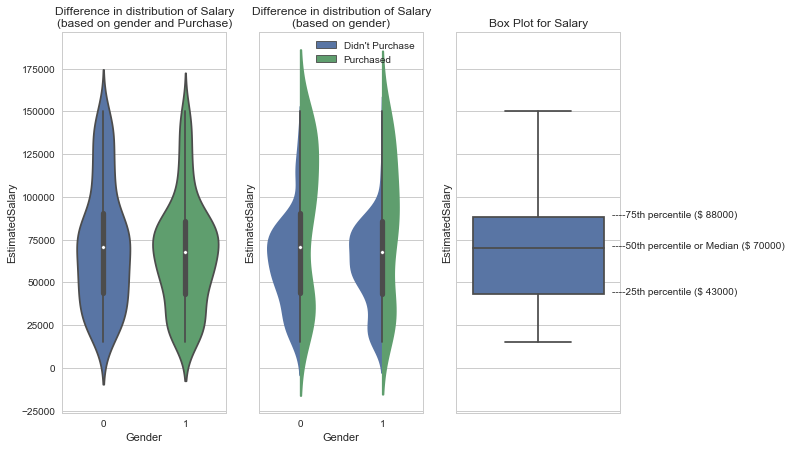

In [17]:
fig, ax = plt.subplots(1,3,figsize=(10,7),sharey=True)
sns.violinplot(x = 'Gender',y = 'EstimatedSalary', data=social, split=True, ax= ax[0]);
sns.violinplot(x = 'Gender',y = 'EstimatedSalary', hue='Purchased', data=social, split=True, ax= ax[1]);
sns.boxplot(y = social['EstimatedSalary'], ax=ax[2]);
ax[0].set_title("Difference in distribution of Salary\n(based on gender and Purchase)");
ax[1].set_title("Difference in distribution of Salary\n(based on gender)");
ax[2].set_title("Box Plot for Salary");
ax[2].text(0.45, 88000, "----75th percentile ($ 88000)");
ax[2].text(0.45, 70000, "----50th percentile or Median ($ 70000)");
ax[2].text(0.45, 43000, "----25th percentile ($ 43000)");
handles, labels = ax[1].get_legend_handles_labels();
ax[1].legend(handles, ["Didn't Purchase", "Purchased"]);

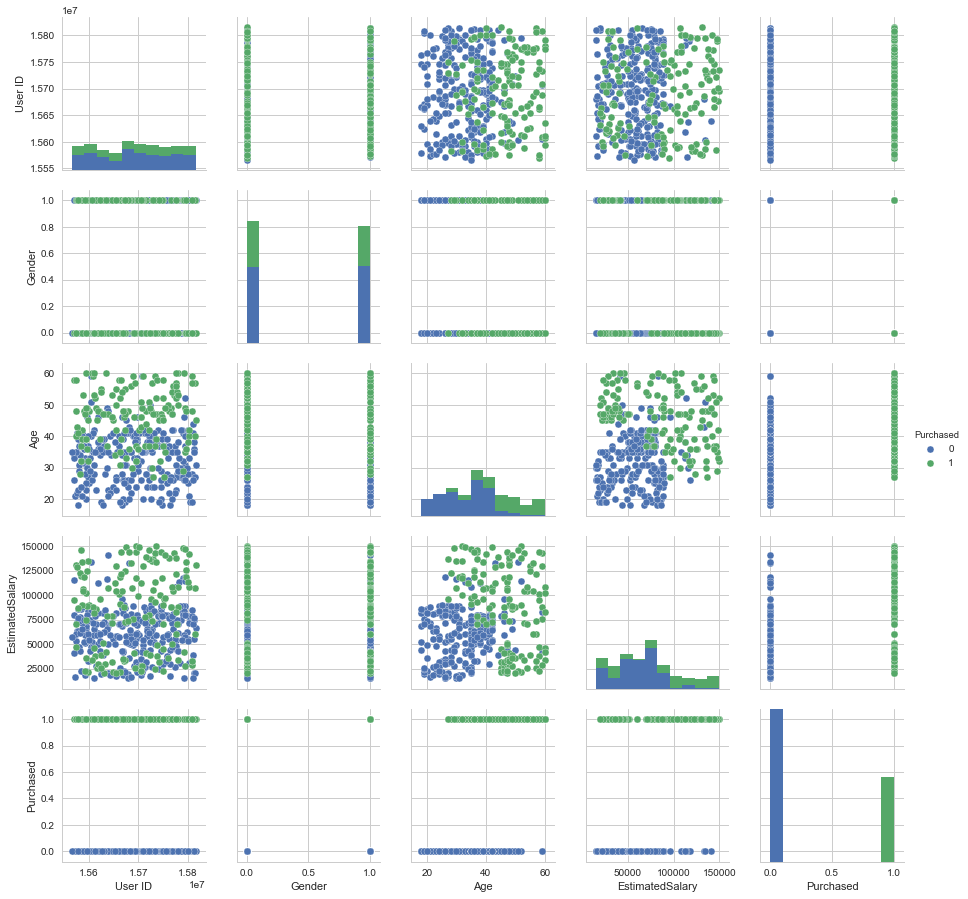

In [18]:

sns.pairplot(social, hue='Purchased');

With the increase in age or Salary, chances of purchase inreases as more people have purchased when they are aged or earning more. However, there doesn't seem to be a major difference due to gender. 
Also, seeing the linear seperability of the people who purchased (in scatter plot of Age vs Estimated Salary), we can say that logistic should fit the best.

With these visualization we can also see that there is cluster formation with age and estimated salary

<a id='Feature_Engineering'></a>

<a id='Feature_Engineering'></a>

## Feature Engineering

In [19]:
from sklearn.cluster import KMeans
kmeanerror=[]
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n in k:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(social[['Gender','Age','EstimatedSalary']])
    kmeanerror.append(kmeans.inertia_)


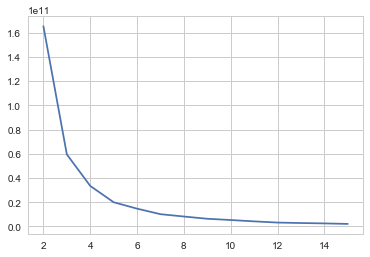

In [20]:

plt.plot(k, kmeanerror);

using the elbow method we can say that the optimum number of clusters is 3/4
taking the value as **3**

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(social[['Gender','Age','EstimatedSalary']])
cluster = kmeans.predict(social[['Gender','Age','EstimatedSalary']])
cluster = pd.get_dummies(cluster)[1:]
social = social.join(cluster).loc[1:]

<a id='Train_Test_Split'></a>

## Dividing into test and train data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(social[['Age','EstimatedSalary','Gender',0,1]], social['Purchased'], train_size=.75, random_state=943526)

<a id='Compare_Train_Test'></a>

## Comparing test and train data

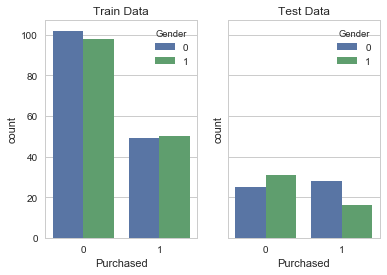

In [23]:

fig, ax = plt.subplots(1,2, sharey= True)
sns.countplot(y_train,hue=X_train['Gender'], ax=ax[0]);
ax[0].set_title("Train Data");
sns.countplot(y_test,hue=X_test['Gender'], ax=ax[1]);
ax[1].set_title("Test Data");

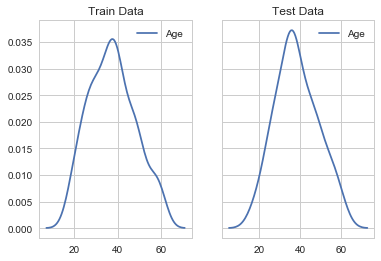

In [24]:

fig, ax = plt.subplots(1,2, sharey= True)
sns.kdeplot(X_train['Age'], ax=ax[0] );
ax[0].set_title("Train Data");
sns.kdeplot(X_test['Age'], ax=ax[1] );
ax[1].set_title("Test Data");

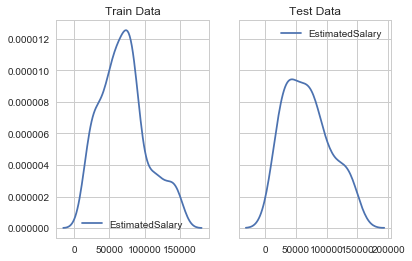

In [25]:

fig, ax = plt.subplots(1,2, sharey= True)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax[0] );
ax[0].set_title("Train Data");
sns.kdeplot(X_test['EstimatedSalary'], ax=ax[1] );
ax[1].set_title("Test Data");

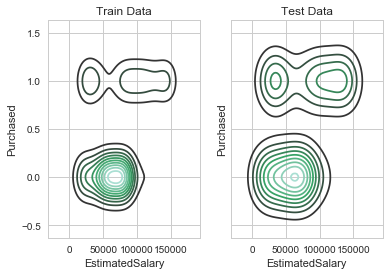

In [26]:

sns.set_style('whitegrid');
fig, ax = plt.subplots(1,2, sharey= True, sharex=True)
sns.kdeplot(X_train['EstimatedSalary'],y_train, ax=ax[0] );
ax[0].set_title("Train Data");
sns.kdeplot(X_test['EstimatedSalary'],y_test, ax=ax[1] );
ax[1].set_title("Test Data");
#sns.kdeplot(social['EstimatedSalary'], social['Purchased']);

<a id='Model_Training'></a>

##  Model Training

In [27]:
def evaluation_plots(est, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    #model: estimator function
    print('Model R2 on train data is: ', est.score(X_train, y_train));
    print('Model R2 on test data is: ', est.score(X_test, y_test));
    print('\n\nClassification report: \n', metrics.classification_report(y_test, est.predict(X_test)));
    plt.figure();
    sns.heatmap(metrics.confusion_matrix(y_test, est.predict(X_test)), 
            cmap='viridis',annot=True, annot_kws={'fontsize':13},
            cbar=False, xticklabels=['Predicted Negative','Predicted Positive '], yticklabels=['Actual Negative','Actual Positive']);
    plt.title("Confusion Matrix", fontsize=20);
    
    train_size, train_score, CV_score = learning_curve(est, X_train, y_train, train_sizes=np.linspace(0.1,1, 5));
    plt.figure();
    plt.plot(train_size, np.mean(train_score, axis=1), 'o-', color='b', label='training score');
    plt.plot(train_size, np.mean(CV_score, axis=1), 'o-', color='r', label='CV score');
    plt.xlabel("Training examples");
    plt.ylabel("Score");
    plt.fill_between(train_size, np.mean(train_score, axis=1) - np.std(train_score, axis=1),
                     np.mean(train_score, axis=1) + np.std(train_score, axis=1), alpha=0.1,
                     color="b");
    plt.fill_between(train_size, np.mean(CV_score, axis=1) - np.std(CV_score, axis=1),
                     np.mean(CV_score, axis=1) + np.std(CV_score, axis=1), alpha=0.1,
                     color="r");
    plt.title("Learning Curve", fontsize=20);
    plt.legend();
    plt.show();
    
    plt.figure();
    fpr, tpr, _ = metrics.roc_curve(y_test, est.predict(X_test));
    auc = metrics.auc(fpr, tpr);
    plt.plot(fpr, tpr, 'g-', lw=2);
    plt.plot([0,1],[0,1], 'b--', lw=3);
    plt.ylabel("True Positive rate");
    plt.xlabel("False Positive rate");
    plt.gca().text(.6,.05,"Area under the curve {}".format(np.round(auc, 2)));

<a id='Without_Clusters'></a>

### Model without clusters

Gender may or may not be playing role in accurate prediction 
Let do some training using gender



<a id='Model1'></a>

#### Model1

Model R2 on train data is:  0.66889632107
Model R2 on test data is:  0.56


Classification report: 
              precision    recall  f1-score   support

          0       0.56      1.00      0.72        56
          1       0.00      0.00      0.00        44

avg / total       0.31      0.56      0.40       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


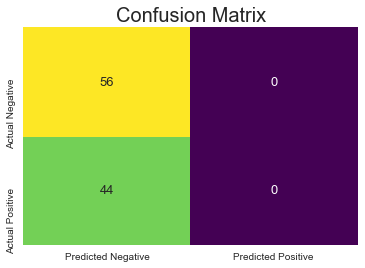

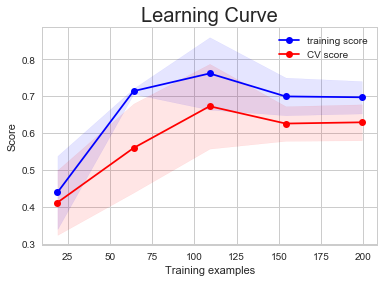

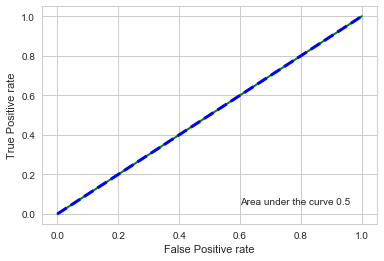

In [28]:
model = LogisticRegression();
model.fit(X_train[['Age','EstimatedSalary']], y_train);
evaluation_plots(model, X_train=X_train[['Age','EstimatedSalary']], y_train=y_train, X_test=X_test[['Age','EstimatedSalary']], y_test=y_test);

#### Model2

Model Training with optimised C and Penalty

Scale Age and Salary

Without Gender

<a id='Model2'></a>

In [29]:
scale = MinMaxScaler();
scale.fit(X_train);
X_train_trans = scale.transform(X_train);
X_test_trans = scale.transform(X_test);

Model R2 on train data is:  0.846153846154
Model R2 on test data is:  0.82


Classification report: 
              precision    recall  f1-score   support

          0       0.77      0.96      0.86        56
          1       0.93      0.64      0.76        44

avg / total       0.84      0.82      0.81       100



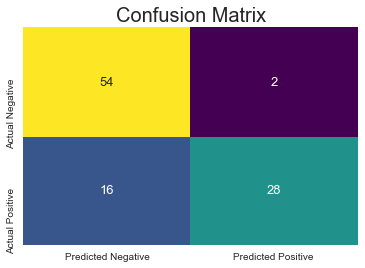

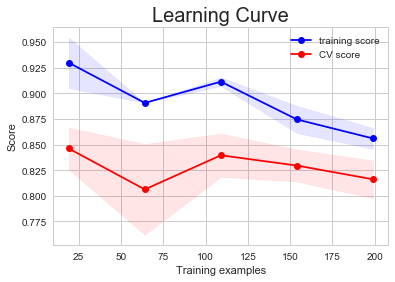

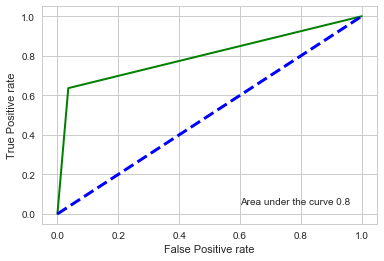

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000], 'penalty':['l1','l2']}
model = LogisticRegression();
gscv = GridSearchCV(model, param_grid= param_grid);
gscv.fit(X_train_trans[:,0:2], y_train);
evaluation_plots(est=gscv, X_train=X_train_trans[:,0:2], y_train=y_train, X_test=X_test_trans[:,0:2], y_test=y_test)

#### Model3

Model With Gender

As predicted gender does not have any affect on purchase prediction

<a id='Model3'></a>

Model R2 on train data is:  0.846153846154
Model R2 on test data is:  0.81


Classification report: 
              precision    recall  f1-score   support

          0       0.77      0.95      0.85        56
          1       0.90      0.64      0.75        44

avg / total       0.83      0.81      0.80       100



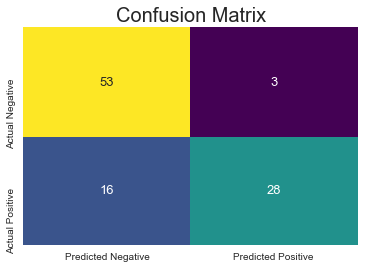

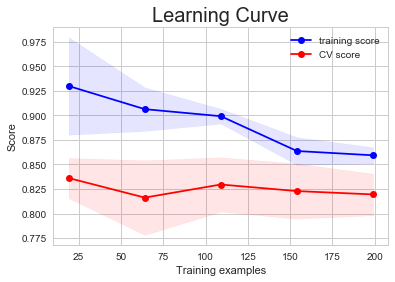

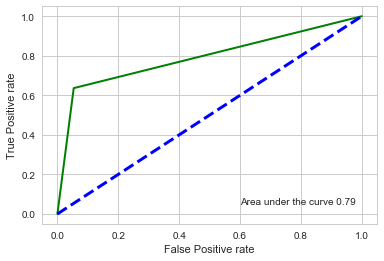

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000], 'penalty':['l1','l2']}
model = LogisticRegression();
gscv = GridSearchCV(model, param_grid= param_grid);
gscv.fit(X_train_trans[:,0:3], y_train);
evaluation_plots(est=gscv, X_train=X_train_trans[:,0:3], y_train=y_train, X_test=X_test_trans[:,0:3], y_test=y_test)

<a id='With_Clusters'></a>

<a id='With_Clusters'></a>

### With Clusters

#### Model4


model training without gender

With No default parameters

Not-scaled variables

<a id='Model4'></a>

Model R2 on train data is:  0.66889632107
Model R2 on test data is:  0.56


Classification report: 
              precision    recall  f1-score   support

          0       0.56      1.00      0.72        56
          1       0.00      0.00      0.00        44

avg / total       0.31      0.56      0.40       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


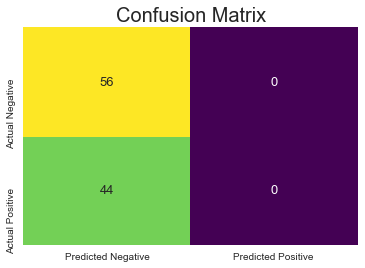

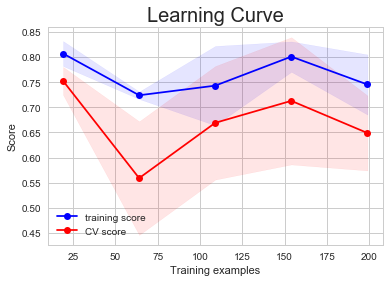

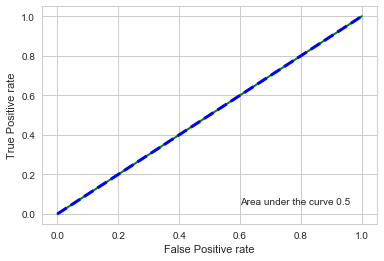

In [32]:
model = LogisticRegression()
model.fit(X_train[['Age','EstimatedSalary',0,1]], y_train)
evaluation_plots(model, X_train=X_train[['Age','EstimatedSalary',0,1]], y_train=y_train, X_test=X_test[['Age','EstimatedSalary',0,1]], y_test=y_test)


#### Final Model

With optimised parameters, i.e. C and penalty

With scaled parameters and gender

<a id='Final_Model'></a>

Model R2 on train data is:  0.896321070234
Model R2 on test data is:  0.91


Classification report: 
              precision    recall  f1-score   support

          0       0.87      0.98      0.92        56
          1       0.97      0.82      0.89        44

avg / total       0.92      0.91      0.91       100



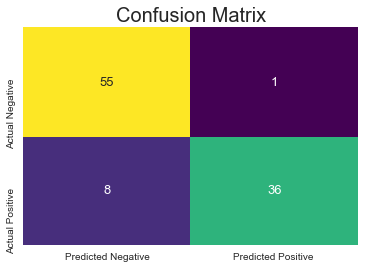

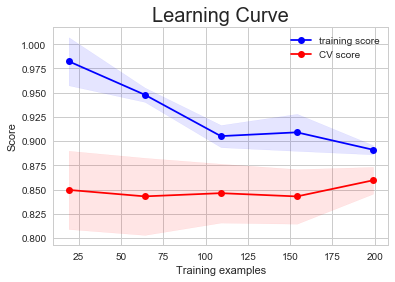

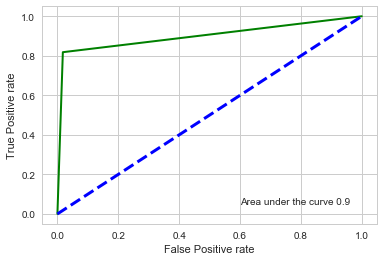

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000], 'penalty':['l1','l2']};
model = LogisticRegression(class_weight={1:.95});
gscv = GridSearchCV(model, param_grid= param_grid);
gscv.fit(X_train_trans, y_train);
evaluation_plots(gscv, X_train=X_train_trans, y_train=y_train, X_test=X_test_trans, y_test=y_test)

Final model for prediction...
